In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_data=pd.read_csv("C:/Users/hp/Documents/Machine Learning/Project/Project Files/heart.csv")

In [2]:
train_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
train_data.shape

(1025, 14)

In [5]:
#checking for duplicate values
train_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
#checking for missing values
train_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [2]:
#finding outliers
X=train_data.drop(["target"],axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [3]:
df_replace_nan = X.mask(X.sub(X.mean()).div(X.std()).abs().gt(3))

df_replace_nan.isnull().sum().sum() 

56

In [4]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())

df_replace_median.isnull().sum().sum() 

0

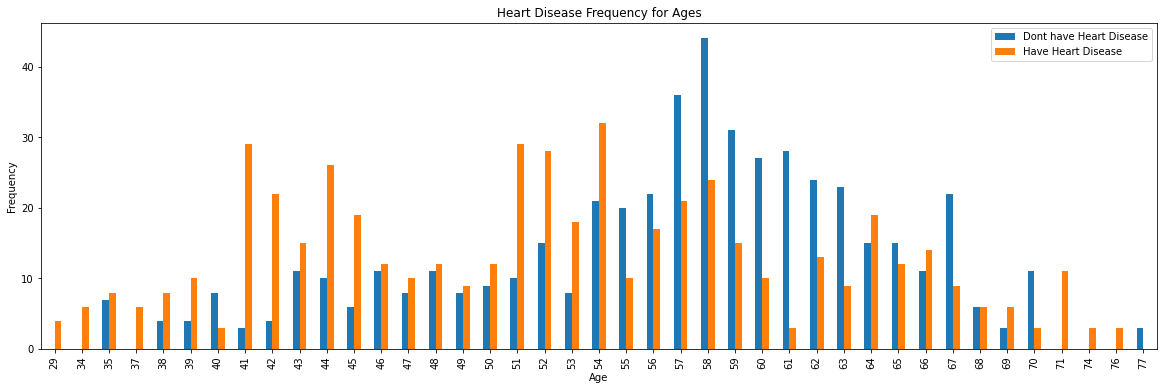

In [10]:
pd.crosstab(train_data.age,train_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

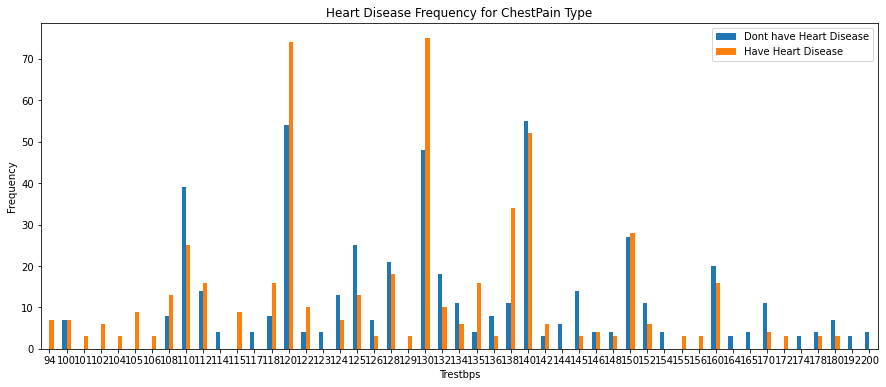

In [11]:
pd.crosstab(train_data.trestbps,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for ChestPain Type')
plt.xlabel('Trestbps')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndtrestbps.png')
plt.show()

In [5]:
#splitting training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:, train_data.columns != 'target'], train_data['target'], 
                 test_size = 0.3, random_state=66)

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [8]:
#Decision tree without tuning
InputFeatures = ['age','sex','cp','trestbps','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
train_df = train_data[InputFeatures]

clf = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=0)
clf.fit(x_train, y_train)

print_score(clf, x_train, y_train, x_test, y_test, train=True)
print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 87.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850949    0.902299  0.875872    0.876624      0.877376
recall       0.902299    0.850949  0.875872    0.876624      0.875872
f1-score     0.875872    0.875872  0.875872    0.875872      0.875872
support    348.000000  369.000000  0.875872  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[314  34]
 [ 55 314]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.832298    0.884354  0.857143    0.858326      0.858833
recall       0.887417    0.828025  0.857143    0.857721      0.857143
f1-score     0.858974    0.855263  0.857143    0.857119      0.857083
support    151.000000  157.000000  0.857143  308.000000    308.

In [16]:
#Hyperparameter tuning of Decision tree
from sklearn.model_selection import GridSearchCV
params = {"criterion": ["gini", "entropy"],
           "min_samples_split": [2, 10],
           "max_depth": [1,2,3,4,5,6,7],
           "min_samples_leaf":list(range(1, 9)),
           "splitter":("best", "random"),
           "max_features": ("auto","sqrt","log2")
               }

tree_clf = DecisionTreeClassifier(random_state=42) 
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", cv=5)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)

print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Best_params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 94.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930168    0.958217  0.944212    0.944192      0.944603
recall       0.956897    0.932249  0.944212    0.944573      0.944212
f1-score     0.943343    0.945055  0.944212    0.944199      0.944224
support    348.000000  369.000000  0.944212  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[333  15]
 [ 25 344]]

Test Result:
Accuracy Score: 89.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.869565    0.925170  0.896104    0.897368      0.897909
recall       0.927152    0.866242  0.896104    0.896697      

In [17]:
#best parameter of the decision tree giving best accuracy
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}